<!-- 
<div style="background-image: url('https://cdn.visualwilderness.com/wp-content/uploads/2019/05/Mothership-VW.jpg'); background-size: cover; background-position: center; padding: 20px; height: 500px; border-radius: 20px;">
    <h1 style="font-weight: bold; font-size: 60px; font-family: avenir; color: white; ">Flood Prediction</h1> -->


<div style="position: relative; padding: 20px; border-radius: 20px;">
    <img src="./images/genders.jpeg" alt="genders" style="width: 100%; height: 100%; object-fit: cover; border-radius: 20px;">
    <h1 style="position: absolute; top: 50%; left: 60%; transform: translate(-50%, -50%); font-weight: bold; font-size: 60px; font-family: avenir; color: white; ">Prediction of Client Gender by Card Transactions</h1>
</div>

<!-- https://gazeta-rk.ru/wp-content/uploads/2023/08/gendernye-predrassudki.jpg -->



<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">

### Overview

The analysis involves examining various factors to understand their influence on predicting a client's gender based on their banking transaction data. This process is crucial for financial institutions, data analysts, and researchers to make informed decisions about customer profiling and personalized services.

### Dataset

The dataset used for this analysis comprises numerous features, providing essential insights into the transactional behavior and demographic details of clients. These features include:

- **customer_id**
- **tr_datetime**
- **mcc_code**
- **tr_type**
- **amount**
- **term_id**
- **gender**
- **mcc_description**
- **tr_description**
- **probability**

### Objectives

1. Develop a comprehensive understanding of the relationships between different transaction features and gender prediction.
2. Investigate the impact of various factors such as transaction datetime, mcc codes, transaction types, amounts, and terminal IDs on gender probability.
3. Provide valuable insights to financial institutions and analysts to facilitate better decision-making regarding customer profiling and targeted services.

### Methodology

1. **Data Collection and Preprocessing:** Utilize the comprehensive dataset and preprocess it by normalizing numerical features and handling missing data.
2. **Feature Engineering:** Extract relevant features and potentially create new ones to enhance the understanding of gender prediction.
3. **Data Analysis:** Explore various statistical methods to identify the relationships and dependencies between different transaction features and gender probability.
4. **Data Interpretation:** Interpret the results of the data analysis to gain insights into the underlying factors influencing gender prediction.

### Steps

1. **Data Preprocessing:**
   - Normalize numerical features to facilitate accurate comparisons.
   - Handle missing data appropriately to ensure data quality.

2. **Feature Engineering:**
   - Identify and extract significant features from the dataset.
   - Create new features if necessary to better capture the intricacies of gender prediction.

3. **Data Analysis:**
   - Utilize statistical methods such as correlation analysis, regression models, and classification algorithms to uncover relationships between transaction features and gender probability.
   - Visualize data to identify trends and patterns that might indicate potential gender differentiation.

4. **Data Interpretation:**
   - Analyze the outcomes of the statistical methods to understand how each transaction feature contributes to gender probability.

### Dataset Description

**File descriptions:**

- **transactions.csv:** Contains the transaction history of bank clients over a year and three months.
- **gender_train.csv:** Contains gender information for a subset of clients.
- **tr_mcc_codes.csv:** Contains descriptions of MCC (Merchant Category Code) codes.
- **tr_types.csv:** Contains descriptions of transaction types.
- **gender_test_kaggle_sample_submission.csv:** A sample file for submission of predictions.

**Data fields:**

- **transactions.csv**
  - **customer_id:** Client identifier
  - **tr_datetime:** Date and time of the transaction
  - **mcc_code:** MCC code of the transaction
  - **tr_type:** Type of transaction
  - **amount:** Transaction amount; positive for credits and negative for debits
  - **term_id:** Terminal identifier

- **gender_train.csv**
  - **customer_id:** Client identifier
  - **gender:** Client's gender

- **tr_mcc_codes.csv**
  - **mcc_code:** MCC code of the transaction
  - **mcc_description:** Description of the MCC code

- **tr_types.csv**
  - **tr_type:** Type of transaction
  - **tr_description:** Description of the transaction type

- **gender_test.csv**
  - **customer_id:** Client identifier
  - **probability:** Probability of the client being of gender "1"

### Evaluation

The quality metric for the prediction is ROC AUC (Area Under the Receiver Operating Characteristic Curve). This metric evaluates the model's ability to distinguish between the classes accurately.

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ffeead, #96ceb4, #b8a9c9); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">



    
## Libraries

In [1]:
# Ignore Warnings
import warnings

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Transformation
from sklearn.preprocessing import  RobustScaler, StandardScaler, MinMaxScaler, FunctionTransformer

# Feature Selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Pipeline
from sklearn.pipeline import Pipeline, FeatureUnion  # Импорт классов Pipeline и make_pipeline из scikit-learn
from sklearn.base import BaseEstimator, TransformerMixin  # Импорт базовых классов BaseEstimator и TransformerMixin

# Metrics
from sklearn.metrics import (mean_squared_error, make_scorer, r2_score)

# Feature Selection
from sklearn.linear_model import LassoCV

# Metrics
import math


from tqdm.notebook import tqdm


# Optimization
from sklearn.experimental import enable_halving_search_cv  # Enables HalvingGridSearchCV and HalvingRandomSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

# Data Transformation
from sklearn.preprocessing import  RobustScaler, PolynomialFeatures, StandardScaler, MinMaxScaler
from optbinning import OptimalBinning

# Feature Selection
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Pipeline
from sklearn.pipeline import Pipeline, FeatureUnion  # Импорт классов Pipeline и make_pipeline из scikit-learn
from sklearn.base import BaseEstimator, TransformerMixin  # Импорт базовых классов BaseEstimator и TransformerMixin

# Metrics
from sklearn.metrics import (f1_score, roc_auc_score, roc_curve, precision_score, 
                            classification_report, precision_recall_curve, confusion_matrix, 
                            accuracy_score, recall_score, silhouette_score, auc)

from tqdm.notebook import tqdm_notebook


# Classification Algorithm
from lightgbm import LGBMClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings('ignore')  # Disabling warning outputs

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">
    
    
### Project Structure

1. [**Loading Data**](#first): Load the dataset from a file or source into a DataFrame for analysis.
2. [**Data Preprocessing**](#second): Handle any missing or erroneous data, perform data type conversions, and clean the dataset for further analysis.
3. [**Exploratory Data Analysis (EDA)**](#third): Explore the dataset to gain insights into its distribution, relationships, and patterns. Visualize key features and relationships between variables.
4. [**Feature Engineering**](#fifth): Create new features or transform existing ones to improve the predictive power of the model.
6. [**Feature Selection**](#nth): Utilize machine learning algorithms to select the best features.
7. [**Model Training and Validating**](#seventh): Training the model.
8. [**Model Evaluation**](#eighth): Evaluate the trained model's performance using appropriate metrics and techniques.
9. [**Test Submission**](#ten): Submitting Test dataset for valuation.

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ffeead, #96ceb4, #b8a9c9); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='first'></a> Loading Data

In [2]:
# Path to the CSV data file
TRAIN_DATAPATH = './data/gender_train.csv'
MCC_CODES_DATAPATH = './data/tr_mcc_codes.csv'
TRANS_TYPES_DATAPATH = './data/tr_types.csv'
TRANSACTIONS_DATAPATH = './data/transactions.csv'

# Path to the Tset CSV data file for submission
TEST_DATAPATH = './data/gender_test.csv'

# Read the training data into a pandas DataFrame
train = pd.read_csv(TRAIN_DATAPATH)

# Read the MCC codes data into a pandas DataFrame, specifying the delimiter as ';'
mcc_codes = pd.read_csv(MCC_CODES_DATAPATH, delimiter=';')

# Read the transaction types data into a pandas DataFrame, specifying the delimiter as ';'
transaction_types = pd.read_csv(TRANS_TYPES_DATAPATH, delimiter=';')

# Read the transactions data into a pandas DataFrame
transactions = pd.read_csv(TRANSACTIONS_DATAPATH)

# Read the test data into a pandas DataFrame
test = pd.read_csv(TEST_DATAPATH)

In [3]:
# Display the first few rows of the DataFrame
train.head()

,customer_id,gender
0,10928546,1
1,69348468,1
2,61009479,0
3,74045822,0
4,27979606,1


In [4]:
# Display the first few rows of the DataFrame
mcc_codes.head()

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело


In [5]:
# Display the first few rows of the DataFrame
transaction_types.head()

,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...


In [6]:
# Display the first few rows of the DataFrame
transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN


In [7]:
# Merge the 'train' DataFrame with the 'transactions' DataFrame on 'customer_id' 
train_df = pd.merge(train, transactions, on='customer_id', how='left') \
            .merge(transaction_types, on='tr_type', how='left') \
            .merge(mcc_codes, on='mcc_code', how='left')

# Display the first few rows of the merged DataFrame
train_df.head()


,customer_id,gender,tr_datetime,mcc_code,tr_type,amount,term_id,tr_description,mcc_description
0,10928546,1,0 00:00:00,5994,1210,-13337.60,NaN,Покупка. POS Зарубеж. ТУ,Дилеры по продаже печатной продукции
1,10928546,1,0 00:00:00,5812,1210,-17731.51,NaN,Покупка. POS Зарубеж. ТУ,"Места общественного питания, рестораны"
2,10928546,1,0 00:00:00,7011,1210,-6566.38,NaN,Покупка. POS Зарубеж. ТУ,"Отели, мотели, базы отдыха, сервисы бронирования"
3,10928546,1,1 00:00:00,5977,1210,-128075.14,NaN,Покупка. POS Зарубеж. ТУ,Магазины косметики
4,10928546,1,1 00:00:00,4722,1210,-332776.44,NaN,Покупка. POS Зарубеж. ТУ,Туристические агентства и организаторы экскурсий


<!-- <div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE);background-image: url('https://www.icegif.com/wp-content/uploads/fat-lady-singing-icegif-4.gif'); border: 2px solid #000; border-radius: 10px; font-family: avenir;"> -->

<div style="position: relative; padding: 10px; background-image: linear-gradient(to right, #ECE3CE, #fffff); border: 2px solid #000; border-radius: 10px; font-family: avenir;">



<!-- <div style="position: absolute; bottom: 10; right: 0; width: 300px; height: 300px; background-image: url('https://i.gifer.com/TOSe.gif'); background-size: cover;border-radius: 10px;"></div> -->

<div style="position: absolute; top: 19px; right: 20px; width: 200px; height: 180px; background-image: url('https://cdn.dribbble.com/users/12601/screenshots/3554804/gif.gif'); background-size: 100% 100%; border-radius: 10px;"></div>

<!-- <div style="position: absolute; bottom: 25px; right: 25px; width: 200px; height: 180px; background-image: url('https://i.gifer.com/origin/0a/0a213d24412a85a075511544e06b116a.gif'); background-size: 100% 100%; border-radius: 10px;"></div> -->


<div style="position: absolute; bottom: 19px; right: 20px; width: 200px; height: 180px; background-image: url('https://i.pinimg.com/originals/13/13/7d/13137d5f9dd7ce895b5f20fc726be2e0.gif'); background-size: 100% 100%; border-radius: 10px;"></div>




### train

- **customer_id**: Client identifier
- **tr_datetime**: Date and time of the transaction
- **mcc_code**: MCC (Merchant Category Code) code of the transaction
- **tr_type**: Type of transaction
- **amount**: Transaction amount; positive for credits and negative for debits
- **term_id**: Terminal identifier
- **tr_description**: Description of the transaction type (available in the tr_types.csv file)
- **mcc_description**: Description of the MCC code (available in the tr_mcc_codes.csv file)
- **gender**: Client's gender (available in the gender_train.csv file)

### test:
- **customer_id**: Client identifier
- **probability**: Probability of the client being of gender "1" (available in the gender_test.csv file)

</div>


In [8]:
# Initialize empty lists to store object and non-object columns
obj = []
ints = []

# Loop through DataFrame columns
for col in train_df.columns:
    # Check if column data type is object
    if train_df[col].dtype == 'object':
        # If object, append column name, unique values count, and count of missing values to 'obj' list
        obj.append((col, train_df[col].nunique(), train_df[col].isna().sum()))
    else:
        # If non-object, append column name, unique values count, and count of missing values to 'ints' list
        ints.append((col, train_df[col].nunique(), train_df[col].isna().sum(), train_df[col].skew()))

# Determine the maximum length of 'obj' and 'ints' lists
max_len = max(len(obj), len(ints))

# Extend 'obj' and 'ints' lists with empty tuples to match the maximum length
obj.extend([('', '', '')] * (max_len - len(obj)))
ints.extend([('', '', '', '')] * (max_len - len(ints)))

# Create a dictionary with keys representing column categories and values representing lists of corresponding data
data = {
    'Categorical_columns': [x[0] for x in obj],
    'cat_cols_uniques': [x[1] for x in obj],
    'cat_cols_missing': [x[2] for x in obj],
    'Numeric_columns': [x[0] for x in ints],
    'int_cols_uniques': [x[1] for x in ints],
    'int_cols_missing': [x[2] for x in ints],
    'int_cols_skew': [x[3] for x in ints]
}

# Convert the dictionary into a pandas DataFrame
pd.DataFrame(data)

,Categorical_columns,cat_cols_uniques,cat_cols_missing,Numeric_columns,int_cols_uniques,int_cols_missing,int_cols_skew
0,tr_datetime,3115033,0,customer_id,8400,0,-0.080239
1,term_id,311690,1519541,gender,2,0,0.092497
2,tr_description,63,1505,mcc_code,184,0,1.042267
3,mcc_description,184,0,tr_type,76,0,1.452334
4,,,,amount,247004,0,1.543529


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">
    
**Categorical Columns:**
- The dataset includes four categorical variables: 'tr_datetime', 'term_id', 'tr_description', and 'mcc_description'.
  - **tr_datetime**: 3,114,423 unique values, no missing values.
  - **term_id**: 311,672 unique values, 1,519,401 missing values.
  - **tr_description**: 63 unique values, no missing values.
  - **mcc_description**: 184 unique values, no missing values.

**Numeric Columns:**
- The dataset includes four numeric variables: 'mcc_code', 'tr_type', 'amount', and 'gender'.
  - **mcc_code**: 184 unique values, no missing values, skewness of 1.043078.
  - **tr_type**: 71 unique values, no missing values, skewness of 1.452298.
  - **amount**: 246,971 unique values, no missing values, skewness of 1.543189.
  - **gender**: 2 unique values, no missing values, skewness of 0.092669.



In [9]:
# Printing out the column names of the dataframe.
print(transactions.columns)


Index(['customer_id', 'tr_datetime', 'mcc_code', 'tr_type', 'amount',
       'term_id'],
      dtype='object')


In [10]:
# This line of code retrieves the shape of the DataFrame 'df'
shape = transactions.shape
print(shape)

(6849346, 6)


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ffeead, #96ceb4, #b8a9c9); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='second'></a> Data Preprocessing

In [11]:
# Displaying concise summary information about the DataFrame, including
# data types, non-null values, and memory usage
transactions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6849346 entries, 0 to 6849345
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   customer_id  int64  
 1   tr_datetime  object 
 2   mcc_code     int64  
 3   tr_type      int64  
 4   amount       float64
 5   term_id      object 
dtypes: float64(1), int64(3), object(2)
memory usage: 313.5+ MB


In [12]:
# Displaying the data types of each column in the DataFrame
transactions.dtypes

customer_id      int64
tr_datetime     object
mcc_code         int64
tr_type          int64
amount         float64
term_id         object
dtype: object

In [13]:
# Calculate the sum of missing values for each column and reset the index, storing the result in a new DataFrame called 'isna'
isna = transactions.isna().sum().reset_index(name="missing_values")

# Calculate the percentage of missing values for each column and add it as a new column called 'percentage' in the 'isna' DataFrame
isna['percentage'] = round((isna['missing_values'] / transactions.shape[0]) * 100, 2)

# Sort the 'isna' DataFrame by the 'missing_values' column in descending order and display the top 35 rows
isna.sort_values(by='missing_values', ascending=False)


,index,missing_values,percentage
5,term_id,2765195,40.37
0,customer_id,0,0.00
1,tr_datetime,0,0.00
2,mcc_code,0,0.00
3,tr_type,0,0.00
4,amount,0,0.00


In [14]:
# Counting the number of duplicated rows in the DataFrame 
transactions.duplicated().value_counts()


False    6826527
True       22819
Name: count, dtype: int64

In [15]:
transactions.isnull().sum()

customer_id          0
tr_datetime          0
mcc_code             0
tr_type              0
amount               0
term_id        2765195
dtype: int64

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ffeead, #96ceb4, #b8a9c9); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='third'></a> Exploratory Data Analysis

In [16]:
# Disable scientific notation
pd.set_option('display.float_format', lambda x: '%.0f' % x)

# Generate descriptive statistics for all numerical columns
train_df.describe()

,customer_id,gender,mcc_code,tr_type,amount
count,3751083,3751083,3751083,3751083,3751083
mean,50994404,0,5586,2440,-21383
std,28553148,0,604,2215,543805
min,22899,0,742,1000,-145984525
25%,26211677,0,5211,1030,-22459
50%,52522078,0,5541,1110,-5615
75%,74523192,1,6010,2370,-1123
max,99999680,1,9402,8146,145984525


In [17]:
train_df.describe(include='object')

pd.reset_option('display.float_format')

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 40px; text-align: center; font-family: avenir;">
    
### Visualising Numerical features distribution

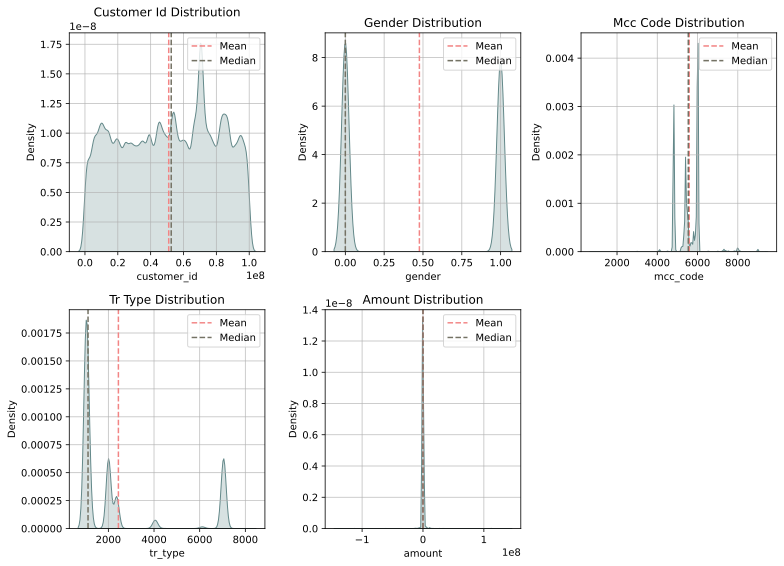

In [18]:
# Select numerical columns from the DataFrame
numerics = train_df.select_dtypes(include=np.number)

# Calculate the number of plots, rows, and columns for subplots
num_plots = len(numerics.columns)
num_columns = 3
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)



# Set the figure size based on the number of rows
plt.figure(figsize=(11, 4 * num_rows))

# Iterate over each numerical column and create a histogram subplot
for i, col in enumerate(numerics, 1):
    plt.subplot(num_rows, num_columns, i)  # Create subplot
    mean_values = numerics[col].mean()
    median = numerics[col].median()

    sns.kdeplot(numerics[col], fill=True, color='#638889')  # Plot histogram using seaborn
    plt.axvline(x=mean_values, color='#F28585', linestyle='--', label='Mean')
    plt.axvline(x=median, color='#747264', linestyle='--', label='Median')
    plt.grid(True, alpha=0.8)  # Add grid lines to the plot
    plt.title(f'{" ".join(list(map(str.title, col.split("_"))))} Distribution')  # Set title for the subplot
    plt.savefig('./images/kdeplot.png')
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plots

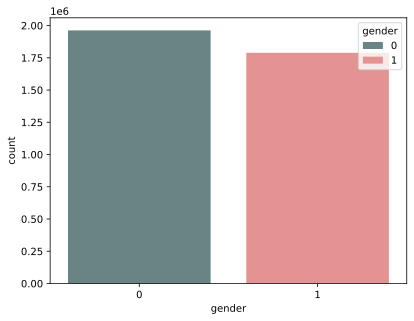

In [19]:
# Plotting
plt.figure(figsize=(8, 7))

# Plot a countplot of 'gender' column with hue set to 'gender' for additional distinction, using specified color palette
sns.countplot(data=train_df, x='gender', hue='gender', palette=['#638889', '#f28585'])

# Display the plot
plt.show()

In [20]:
train_df.groupby('gender')['gender'].count()

gender
0    1962190
1    1788893
Name: gender, dtype: int64

In [21]:
# Group by mcc_description for gender 0, calculate percentage, and sort
gen_0 = train_df[train_df['gender'] == 0].groupby(['mcc_description'])\
.agg(count = ('mcc_description', lambda x: (x.count() / len(train_df['gender'] == 0)) * 100))\
.sort_values(by='count', ascending=False)[:50]

# Group by mcc_description for gender 1, calculate percentage, and sort
gen_1 = train_df[train_df['gender'] == 1].groupby(['mcc_description'])\
.agg(count = ('mcc_description', lambda x: (x.count() / len(train_df['gender'] == 1)) * 100))\
.sort_values(by='count', ascending=False)[:50]

# Merge the gender 0 and gender 1 dataframes on mcc_description
plot_ = pd.merge(gen_0, gen_1, on='mcc_description', suffixes=('_0', '_1')).reset_index()

# Melt the dataframe to long format
df_melted = plot_.melt(id_vars='mcc_description', var_name='count_type', value_name='count')


In [22]:
# Установка опции для отображения всей ширины колонок
pd.options.display.max_colwidth = None

plot_

,mcc_description,count_0,count_1
0,Финансовые институты — снятие наличности автоматически,11.193994,10.489931
1,"Звонки с использованием телефонов, считывающих магнитную ленту",8.380193,6.240571
2,"Бакалейные магазины, супермаркеты",7.672318,6.707796
3,Финансовые институты — снятие наличности вручную,7.103415,6.347367
4,Денежные переводы,4.604750,4.228885
5,"Различные продовольственные магазины — рынки, магазины со спец-ассортиментом, продажа полуфабрикатов, фирменных блюд, продажа с помощью торговых автоматов",2.645903,2.378326
6,Аптеки,1.289094,0.741546
7,Универсальные магазины,1.086220,0.864977
8,"Места общественного питания, рестораны",0.692813,0.871908
9,"Рестораны, закусочные",0.609291,0.806167


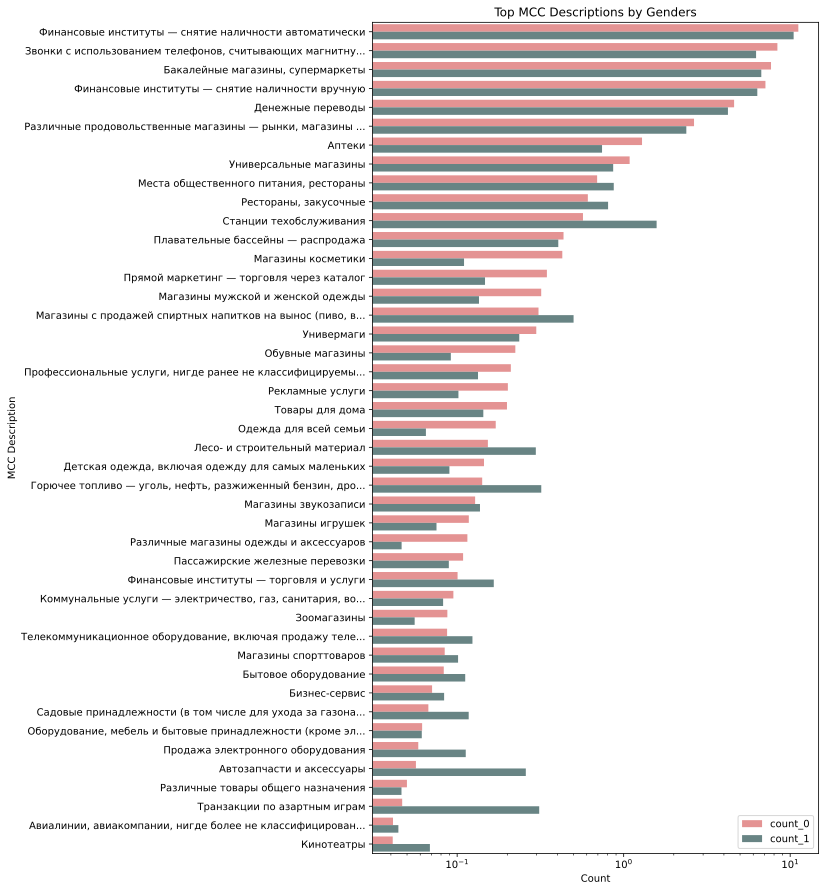

In [23]:
# Truncate y labels
def truncate_labels(labels, max_length=55):
    return [label if len(label) <= max_length else label[:max_length] + '...' for label in labels]

# Applying Truncate y labels function
df_melted['mcc_description'] = truncate_labels(df_melted['mcc_description'])

# Plotting
plt.figure(figsize=(8, 15))
sns.barplot(data=df_melted, y='mcc_description', x='count', hue='count_type', palette =['#f28585', '#638889'])
plt.title('Top MCC Descriptions by Genders')
plt.xlabel('Count')
plt.ylabel('MCC Description')
plt.xscale('log')
plt.legend()
plt.show()

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">

Based on the data analysis, where `Class 0` is assumed to represent Females and `Class 1` represents Males, we can further delve into the gender-specific spending patterns:

- **Transactions at Gas Stations**: The significant disparity in transactions at gas stations is noteworthy. Men (Class 1) exhibit a substantially higher count of transactions (1.577171) compared to women (Class 0) with a count of 0.569675. This suggests that men may be more likely to engage in activities that require regular fueling, such as driving or commuting via personal vehicles.

- **Gambling Transactions**: Another distinctive difference lies in gambling transactions. Men (Class 1) show a considerably higher count (0.310977) compared to women (Class 0) with a count of 0.046760. This disparity indicates that men may have a greater inclination towards participating in gambling activities, whether at casinos or through online platforms.

- **Construction and Building Materials**: Men (Class 1) demonstrate a higher count in purchasing construction and building materials (0.296768) compared to women (Class 0) with a count of 0.152942. This observation suggests that men may be more actively involved in construction-related projects or DIY endeavors, reflecting potential differences in household roles or leisure activities.

- **Fuel**: The discrepancy in the purchase of combustible fuels like coal, oil, liquefied gasoline, and wood is also notable. Men (Class 1) exhibit a higher count (0.319988) compared to women (Class 0) with a count of 0.141373. This trend aligns with the hypothesis that men may engage more frequently in activities or hobbies that necessitate the use of such fuels, such as outdoor grilling or home maintenance tasks.

- **Pharmacies**: Conversely, women (Class 0) display a higher count of transactions at pharmacies (1.289094) compared to men (Class 1) with a count of 0.741546. This discrepancy suggests that women may take a more proactive approach towards managing health-related needs or household medical requirements.

- **Cosmetic Stores**: Women (Class 0) also exhibit a higher count in transactions at cosmetic stores (0.428036) compared to men (Class 1) with a count of 0.109968. This difference reinforces the stereotype that women tend to prioritize purchases related to personal grooming and cosmetics, reflecting societal norms and beauty standards.

Overall, the data underscores distinct gender-based spending habits, with men showing a propensity towards transactions associated with transportation, construction, and leisure pursuits like gambling (dining out, certain leisure activities like swimming pool tickets), while women's transactions are more prominent in areas related to health, personal care, daily necessities, cosmetics, clothing, household items, and certain services. 

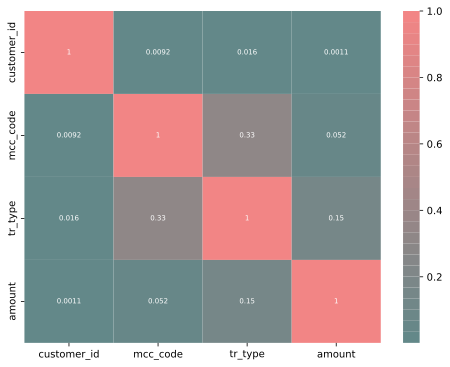

In [24]:
# Create a figure with custom size
plt.figure(figsize=(8, 6))

# Generate a heatmap of correlations for numerical columns in the DataFrame
sns.heatmap(
    transactions.select_dtypes(include=np.number).corr(),  # DataFrame correlation matrix for numerical columns
    annot=True,  # Show correlation values in cells
    cmap=['#638889', '#678788', '#6c8788', '#718788', '#768788', '#7b8788', '#808788', '#858788', '#8a8787', '#8f8787', 
          '#948687', '#998687', '#9e8687', '#a38687', '#a88687', '#ac8686', '#b18686', '#b68686', '#bb8686', '#c08686',
          '#c58586', '#ca8586', '#cf8585', '#d48585', '#d98585', '#de8585', '#e38585', '#e88585', '#ed8585', '#f28585'],
    annot_kws={"fontsize": 7}  # Annotation font size
)

# Display the heatmap
plt.show()

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ffeead, #96ceb4, #b8a9c9); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='fifth'></a> Feature Engineering

In [25]:
# Extracting the day of the week from the 'tr_datetime' column and storing it as 'days'
transactions['days'] = transactions['tr_datetime'].str.split().apply(lambda x: int(x[0]) % 7)
train_df['days'] = train_df['tr_datetime'].str.split().apply(lambda x: int(x[0]) % 7)

# Extracting the day of the year from the 'tr_datetime' column and storing it as 'day_of_year'
# If the day of the year exceeds 364, subtract 364 to normalize it
transactions['day_of_year'] = transactions['tr_datetime'].str.split().apply(lambda x: int(x[0]) - 364 if int(x[0]) > 364 else int(x[0]))

# Display the first few rows of the transactions DataFrame
transactions.head()


,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,days,day_of_year
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,0,0
1,39026145,1 10:19:29,6011,7010,56147.89,NaN,1,1
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN,1,1
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN,1,1
4,39026145,2 15:33:42,5499,1010,-920.83,NaN,2,2


#### Identifying weekdays

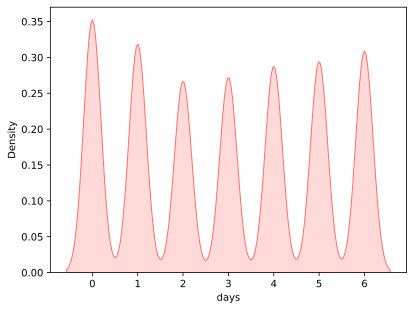

In [26]:
# Define a list of entertainment-related MCC descriptions
entertainment = ['Билльярд-клубы', 'Боулинг-клубы',  'Кинотеатры', 
'Магазины с продажей спиртных напитков на вынос (пиво, вино и ликер)', 
'Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков', 'Рестораны, закусочные',
'Услуги отдыха, нигде ранее не классифицируемые', 'Места общественного питания, рестораны']

# Filter the DataFrame to include only rows with MCC descriptions related to entertainment
days_of_week = train_df[train_df['mcc_description'].isin(entertainment)]

# Plot a kernel density estimate plot of 'days' column for entertainment-related transactions, with fill enabled
sns.kdeplot(data=days_of_week, x='days', fill=True, color='#ff6f69')

# Display the plot
plt.show()


In [27]:
# Map numerical days to their corresponding weekdays
transactions['days'] = transactions['days'].map({2: 'Monday', 3: 'Tuesday', 4: 'Wednesday',
                                                 5: 'Thursday', 6: 'Friday', 0: 'Saturday',
                                                 1: 'Sunday'})

train_df['days'] = train_df['days'].map({2: 'Monday', 3: 'Tuesday', 4: 'Wednesday',
                                                 5: 'Thursday', 6: 'Friday', 0: 'Saturday',
                                                 1: 'Sunday'})

# Create new columns 'income' and 'spent' based on transaction amount
transactions.loc[transactions['amount'] > 0, 'income'] = transactions['amount']
transactions.loc[transactions['amount'] <= 0, 'spent'] = transactions['amount']
train_df.loc[train_df['amount'] > 0, 'income'] = train_df['amount']
train_df.loc[train_df['amount'] <= 0, 'spent'] = train_df['amount']

# Extract hour from 'tr_datetime' column and convert it to integer
transactions['hour'] = transactions['tr_datetime'].apply(lambda x: int(x.split()[1][:2]))
train_df['hour'] = train_df['tr_datetime'].apply(lambda x: int(x.split()[1][:2]))

# Create a new binary column 'night' indicating if the transaction occurred at night
transactions['night'] = ~transactions['hour'].between(5, 22)
transactions['night'] = transactions['night'].astype(int)
train_df['night'] = ~train_df['hour'].between(5, 22)
train_df['night'] = train_df['night'].astype(int)


In [28]:
# Grouping the train_df DataFrame by 'days' and 'gender', and aggregating the count of 'mcc_description' for each group
week_days_df = train_df.groupby(['days', 'gender']).agg(week_count=('mcc_description', lambda x: x.count())).reset_index()

# Resetting the index to have a clean DataFrame
week_days_df


,days,gender,week_count
0,Friday,0,298631
1,Friday,1,265130
2,Monday,0,219653
3,Monday,1,214290
4,Saturday,0,317942
5,Saturday,1,285661
6,Sunday,0,259911
7,Sunday,1,250226
8,Thursday,0,295739
9,Thursday,1,263643


In [29]:
# Grouping the train_df DataFrame by 'days', 'gender', and 'hour', and aggregating the count of 'mcc_description' for each group
week_by_hours = train_df.groupby(['days', 'gender', 'hour']).agg(week_count=('mcc_description', lambda x: x.count())).reset_index()

# Displaying the first few rows of the resulting DataFrame
week_by_hours.head()


,days,gender,hour,week_count
0,Friday,0,0,31026
1,Friday,0,1,1397
2,Friday,0,2,1626
3,Friday,0,3,2212
4,Friday,0,4,3304


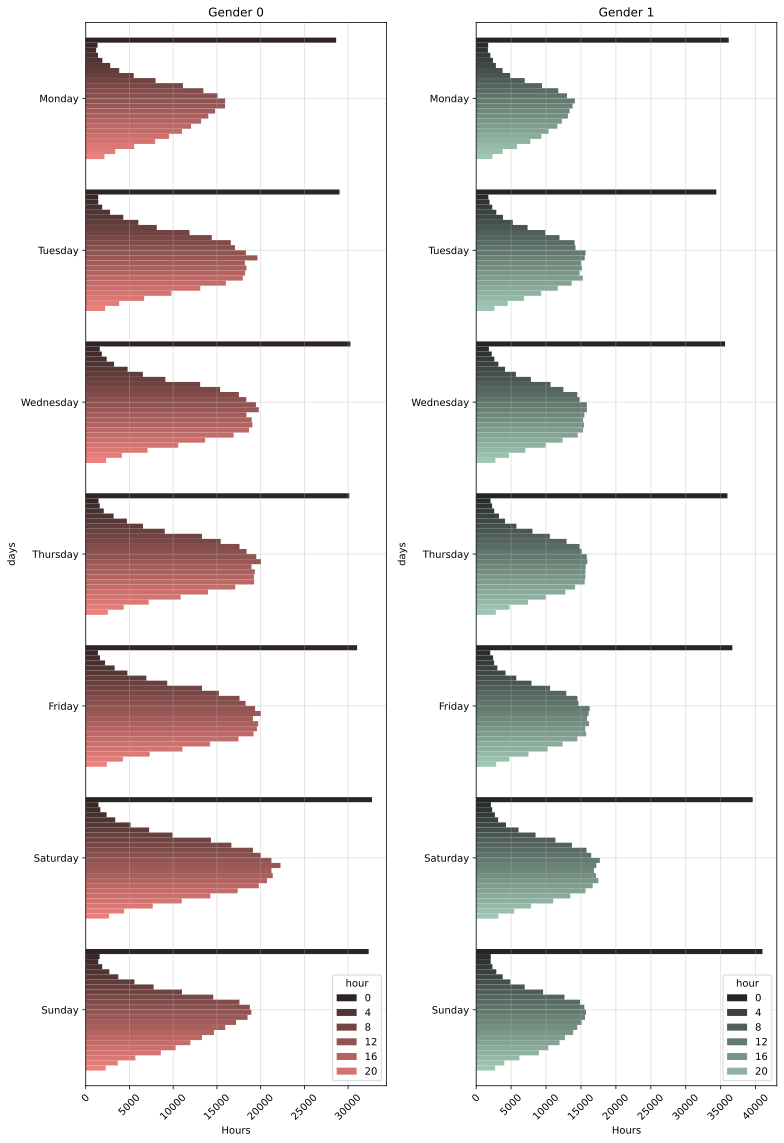

In [30]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(11, 16))

days_of_week_ordered = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Plot for gender 0 on the first subplot
sns.countplot(data=train_df[train_df['gender'] == 0], y='days', ax=axes[0], hue='hour', color='#ff6f69', order=days_of_week_ordered)
axes[0].set_title('Gender 0')
axes[0].set_xlabel('Hours')
axes[0].grid(alpha=0.4)

# Plot for gender 1 on the second subplot
sns.countplot(data=train_df[train_df['gender'] == 1], y='days', ax=axes[1], hue='hour', color='#96ceb4', order=days_of_week_ordered)
axes[1].set_title('Gender 1')
axes[1].set_xlabel('Hours')
axes[1].grid(alpha=0.4)

# Rotate the x-axis labels
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Display the plots
plt.tight_layout()
plt.show()

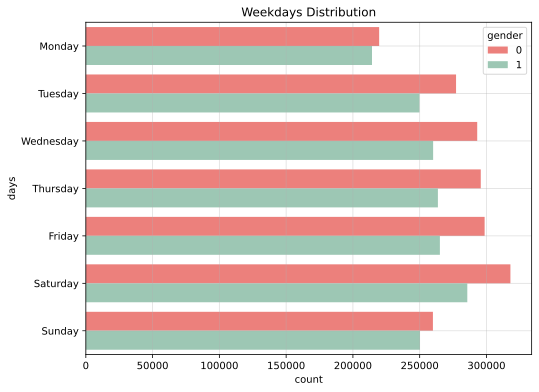

In [31]:
plt.figure(figsize=(8, 6))

# Plotting the count of occurrences of each day of the week, differentiated by gender
sns.countplot(data=train_df, y='days', hue='gender', palette=['#ff6f69', '#96ceb4'], order=days_of_week_ordered)
plt.title('Weekdays Distribution')  # Title for the plot

plt.grid(alpha=0.4)  # Adding grid lines with transparency
plt.show()  # Displaying the plot


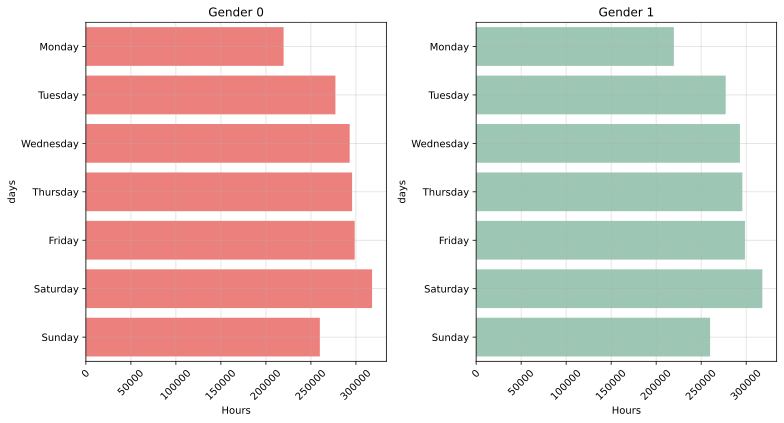

In [32]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(11, 6))

# Plot for gender 0 on the first subplot
sns.countplot(data=train_df[train_df['gender'] == 0], y='days', ax=axes[0], color='#ff6f69', order=days_of_week_ordered)
axes[0].set_title('Gender 0')
axes[0].set_xlabel('Hours')
axes[0].grid(alpha=0.4)

# Plot for gender 1 on the second subplot
sns.countplot(data=train_df[train_df['gender'] == 0], y='days', ax=axes[1], color='#96ceb4', order=days_of_week_ordered)
axes[1].set_title('Gender 1')
axes[1].set_xlabel('Hours')
axes[1].grid(alpha=0.4)

# Rotate the x-axis labels
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Display the plots
plt.tight_layout()
plt.show()

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">

### Gender-Centric Activity Patterns:

1. **Gender-Specific Engagement**:
   - Females consistently demonstrate higher levels of activity compared to males across all days and hours.
   - This trend is particularly noticeable during weekday peak hours, where females exhibit significantly higher engagement than males.

2. **Weekday Gender Dynamics**:
   - On weekdays, both genders follow similar activity patterns with peak engagement observed during mid-morning to early afternoon hours.
   - However, females consistently maintain higher activity levels during these peak hours compared to males, suggesting a gender disparity in weekday participation.

3. **Weekend Gender Dynamics**:
   - Weekend activity patterns also reflect gender differences, albeit with slightly altered timings.
   - Females continue to exhibit higher activity levels during late morning to early afternoon hours on weekends, mirroring the weekday trend.
   - Conversely, males show lower participation levels during weekends, further accentuating the gender disparity in activity patterns.

### Detailed Gender-Specific Insights:

- **Weekday Engagement**:
  - Females dominate weekday activity levels, particularly during peak hours from mid-morning to early afternoon.
  - This disparity suggests a potential difference in weekday routines or preferences between genders.

- **Weekend Participation**:
  - While females maintain higher activity levels during weekends as well, the gap between genders may narrow slightly.
  - Males demonstrate lower engagement levels on weekends compared to weekdays, highlighting a divergence in weekend preferences between genders.

- **Nighttime Dynamics**:
  - Although males exhibit slightly higher activity counts during nighttime hours across both weekdays and weekends, the overall disparity in engagement between genders persists.
  - This nighttime pattern suggests that while males may be more active during late hours, females still maintain a higher overall level of engagement.

Understanding these nuanced gender-specific activity patterns can provide valuable insights for targeted marketing strategies, resource allocation, and event planning to enhance user engagement and satisfaction, particularly by addressing the differing preferences and behaviors of each gender.

In [33]:
# Grouping the train_df DataFrame by 'night' and 'gender', and aggregating the count of 'mcc_description' for each group
night_df = train_df.groupby(['night', 'gender']).agg(night_count=('mcc_description', lambda x: x.count())).reset_index()

night_df.head()

,night,gender,night_count
0,0,0,1675688
1,0,1,1443909
2,1,0,286502
3,1,1,344984


In [34]:
# Grouping the train_df DataFrame by 'hour' and 'gender', and aggregating the count of 'mcc_description' for each group
hour_df = train_df.groupby(['hour', 'gender']).agg(night_count=('mcc_description', lambda x: x.count())).reset_index()

# Displaying the first few rows of the resulting DataFrame
hour_df.head()


,hour,gender,night_count
0,0,0,214164
1,0,1,259355
2,1,0,10279
3,1,1,13539
4,2,0,10792


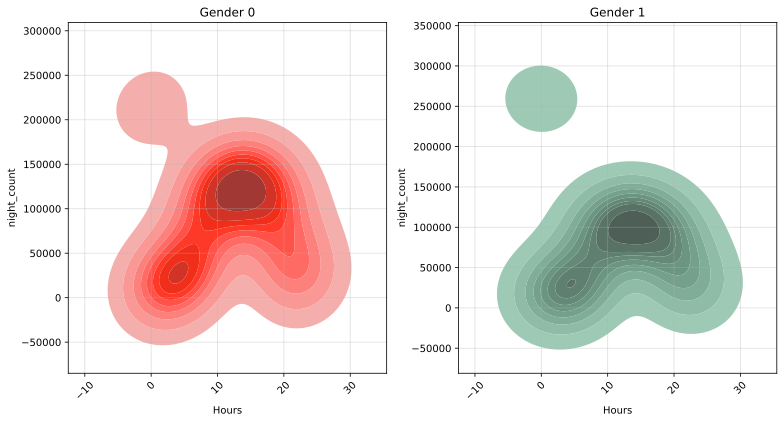

In [35]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(11, 6))

# Plot for gender 0 on the first subplot
sns.kdeplot(data=hour_df[hour_df['gender'] == 0], x='hour', y='night_count', ax=axes[0], fill=True, color='#ff6f69')
axes[0].set_title('Gender 0')
axes[0].set_xlabel('Hours')
axes[0].grid(alpha=0.4)
4
# Plot for gender 1 on the second subplot
sns.kdeplot(data=hour_df[hour_df['gender'] == 1], x='hour', y='night_count', ax=axes[1], fill=True, color='#96ceb4')
axes[1].set_title('Gender 1')
axes[1].set_xlabel('Hours')
axes[1].grid(alpha=0.4)

# Rotate the x-axis labels
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Display the plots
plt.tight_layout()
plt.show()

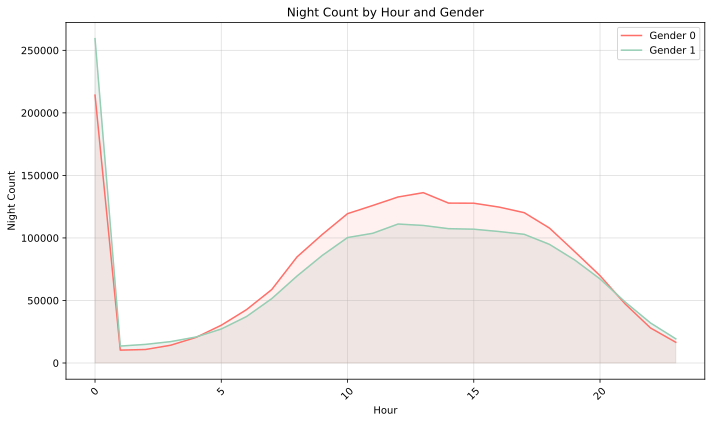

In [36]:
# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot for gender 0
sns.lineplot(data=hour_df[hour_df['gender'] == 0], x='hour', y='night_count', ax=ax, label='Gender 0', color='#ff6f69')

# Plot for gender 1
sns.lineplot(data=hour_df[hour_df['gender'] == 1], x='hour', y='night_count', ax=ax, label='Gender 1', color='#96ceb4')


# Add shaded areas for both genders
ax.fill_between(hour_df[hour_df['gender'] == 0]['hour'], hour_df[hour_df['gender'] == 0]['night_count'], color='#ff6f69', alpha=0.1)
ax.fill_between(hour_df[hour_df['gender'] == 1]['hour'], hour_df[hour_df['gender'] == 1]['night_count'], color='#5A7C6C', alpha=0.1)

# Set title and labels
ax.set_title('Night Count by Hour and Gender')
ax.set_xlabel('Hour')
ax.set_ylabel('Night Count')

# Rotate x-axis labels
ax.tick_params(axis='x', rotation=45)
ax.grid(alpha=0.4)

# Add legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


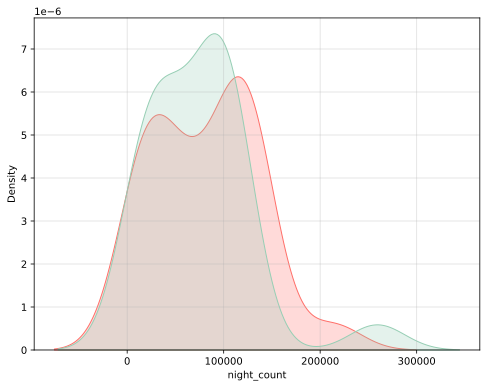

In [37]:
plt.figure(figsize=(8, 6))

# Plotting kernel density estimation for gender 0
sns.kdeplot(data=hour_df[hour_df['gender'] == 0], x='night_count', color='#ff6f69', fill=True)

# Plotting kernel density estimation for gender 1
sns.kdeplot(data=hour_df[hour_df['gender'] == 1], x='night_count', color='#96ceb4', fill=True)

plt.grid(alpha=0.4)  # Adding grid lines with transparency
plt.show()  # Displaying the plot


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">

### Conclusion:

#### General Insights:

1. **Overall Activity Distribution**:
   - Daytime (day) activities are significantly higher than nighttime activities for both genders. This is indicated by the high count of day activities (1,675,688 females and 1,443,909 males) compared to night activities (286,502 females and 344,984 males).

2. **Gender Differences**:
   - Females have a higher overall activity count than males during the day.
   - Males have a slightly higher activity count than females at night.

#### Hourly Activity Patterns:

1. **Peak Activity Times**:
   - Both genders have peak activity during the day, with a notable increase starting around 6 AM and peaking between 10 AM to 2 PM.
   - For both genders, the highest counts are observed in the hours corresponding to midday (10 AM - 2 PM).

2. **Gender-Specific Patterns**:
   - Females show higher activity counts than males during most daytime hours.
   - Males exhibit higher counts than females during the night, though the overall night activity is much lower than daytime activity.

3. **Transition Periods**:
   - There is a gradual increase in activity starting from early morning (5 AM) for both genders.
   - Activity starts to decline in the evening from around 5 PM, with a more significant drop after 8 PM.

4. **Nighttime Observations**:
   - Nighttime activity is relatively low across all hours.
   - Males have a slightly higher activity count during nighttime hours compared to females.

### Detailed Hourly Insights:

- **Morning (12 AM - 6 AM)**:
  - Very low activity for both genders, with a slight increase in the early morning hours.

- **Daytime (6 AM - 6 PM)**:
  - Steady increase in activity starting from 6 AM.
  - Peak activity between 10 AM to 2 PM for both genders.
  - Activity levels start to decline post 4 PM.

- **Evening (6 PM - 12 AM)**:
  - Activity continues to decline with each passing hour.
  - Noticeable drop in activity post 8 PM.


In [38]:
# Extract unique MCC descriptions for gender 1 and convert them to a set
set_a = set(train_df[train_df['gender'] == 1]['mcc_description'].values.tolist())

# Extract unique MCC descriptions for gender 0 and convert them to a set
set_b = set(train_df[train_df['gender'] == 0]['mcc_description'].values.tolist())

# Find the set difference between set_b and set_a
set_b.difference(set_a)


{'Судовые выплаты, включая алименты и детскую поддержку'}

In [39]:
# List of aggregation functions to apply
funcs = [np.sum, np.mean, np.std, np.max, np.min, np.median, np.size]

# Dictionary specifying aggregation functions for each column
agg_funcs = {
    'income': funcs,
    'spent': funcs
}

# Perform aggregation on 'transactions' DataFrame grouped by 'customer_id' using agg_funcs
result = transactions.groupby('customer_id').agg(agg_funcs)

# Flatten the multi-index columns to make them more readable
result.columns = ['_'.join(col).strip() for col in result.columns.values]

# Reset the index to convert 'customer_id' back to a regular column
result = result.reset_index()


In [40]:
# Merge the 'transactions' DataFrame with the aggregated 'result' DataFrame on 'customer_id' using a left join
transactions_merged = pd.merge(transactions, result, on='customer_id', how='left')

# Display the first few rows of the merged DataFrame
transactions_merged.head()


,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,days,day_of_year,income,spent,...,income_min,income_median,income_size,spent_sum,spent_mean,spent_std,spent_max,spent_min,spent_median,spent_size
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,Saturday,0,NaN,-2245.92,...,449.18,67377.47,1046,-17936829.32,-17847.591363,60530.768256,-44.92,-898366.31,-3660.84,1046
1,39026145,1 10:19:29,6011,7010,56147.89,NaN,Sunday,1,56147.89,NaN,...,449.18,67377.47,1046,-17936829.32,-17847.591363,60530.768256,-44.92,-898366.31,-3660.84,1046
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN,Sunday,1,NaN,-56147.89,...,449.18,67377.47,1046,-17936829.32,-17847.591363,60530.768256,-44.92,-898366.31,-3660.84,1046
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN,Sunday,1,NaN,-1392.47,...,449.18,67377.47,1046,-17936829.32,-17847.591363,60530.768256,-44.92,-898366.31,-3660.84,1046
4,39026145,2 15:33:42,5499,1010,-920.83,NaN,Monday,2,NaN,-920.83,...,449.18,67377.47,1046,-17936829.32,-17847.591363,60530.768256,-44.92,-898366.31,-3660.84,1046


In [41]:
def feature_engineering(df): 
    cols = ['mcc_code', 'tr_type', 'days', 'hour', 'night', 'day_of_year']
    prefixes = ['mcc_', 'transaction_', 'week_day_', 'hour_', 'night_', 'day_number_']
    
    features = []

    for col, prefix in zip(cols, prefixes):
        # Append the feature Series to the list of features
        features.append(pd.Series(df[col].value_counts().add_prefix(prefix)))
        
    # Concatenate all features together 
    return pd.concat(features)
    

In [42]:
# Enable tqdm for pandas
tqdm.pandas()

# Group transactions by 'customer_id', apply feature_engineering function to each group, and unstack the result
data = transactions.groupby('customer_id').progress_apply(feature_engineering).unstack()


  0%|          | 0/15000 [00:00<?, ?it/s]

In [43]:
# Fill missing values with 0 inplace
data.fillna(0, inplace=True)

# Display the first few rows of the DataFrame
data.head()


,day_number_0,day_number_1,day_number_10,day_number_100,day_number_101,day_number_102,day_number_103,day_number_104,day_number_105,day_number_106,...,transaction_8100,transaction_8145,transaction_8146,week_day_Friday,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,week_day_Wednesday
customer_id,,,,,,,,,,,,,,,,,,,,,
6815,0.0,1.0,5.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,31.0,27.0,27.0,30.0,33.0,37.0,41.0
22899,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,35.0,21.0,31.0,33.0,40.0,32.0,42.0
27914,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,19.0,20.0,15.0,29.0,3.0,10.0,15.0
28753,1.0,1.0,0.0,2.0,0.0,5.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,41.0,18.0,65.0,15.0,44.0,63.0,48.0
31385,1.0,0.0,2.0,2.0,2.0,2.0,0.0,1.0,6.0,9.0,...,0.0,0.0,0.0,53.0,53.0,56.0,44.0,61.0,45.0,53.0


In [44]:
# Merge the feature-engineered data with the training data based on 'customer_id' using a right join
train_data = pd.merge(data, train, on='customer_id', how="right")

# Merge the feature-engineered data with the test data based on 'customer_id' using a right join
test_data = pd.merge(data, test, on='customer_id', how="right")

# Display the shape of the merged training and test data
print('Train data shape is {} rows and {} columns.'.format(train_data.shape[0], train_data.shape[1]))
print('Test data shape is {} rows and {} columns.'.format(test_data.shape[0], test_data.shape[1]))


Train data shape is 8400 rows and 661 columns.
Test data shape is 3600 rows and 660 columns.


In [45]:
# Convert columns of train_data and test_data to sets
set_a = set(train_data.columns)
set_b = set(test_data.columns)

# Find the set difference between set_a and set_b
set_a.difference(set_b)


{'gender'}

In [46]:
# Set 'customer_id' as the index for train_data DataFrame
train_data.set_index('customer_id', inplace=True)

# Set 'customer_id' as the index for test_data DataFrame
test_data.set_index('customer_id', inplace=True)


In [47]:
# Extract features and encode categorical variables using one-hot encoding
X = train_data.drop(columns='gender').copy()

# Extract the target variable
y = train_data['gender'].copy()

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ffeead, #96ceb4, #b8a9c9); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='nth'></a> Feature Selection

In [48]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Scale the features in postlasso_df using StandardScaler
X_scaled = scaler.fit_transform(X)

lasso_cv = LassoCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1],
                   max_iter=1000, cv=5, random_state=42)

# Fit the LassoCV model to the scaled feature matrix X_scaled and the target vector y
lasso_cv.fit(X_scaled, y)

# Extract the column names (features) where the coefficients are non-zero
selected_features = X.columns[(lasso_cv.coef_ != 0).ravel()].tolist()

# Print the number of selected features
print(selected_features)

['day_number_1', 'day_number_116', 'day_number_119', 'day_number_125', 'day_number_131', 'day_number_139', 'day_number_141', 'day_number_147', 'day_number_153', 'day_number_154', 'day_number_16', 'day_number_163', 'day_number_17', 'day_number_174', 'day_number_216', 'day_number_219', 'day_number_233', 'day_number_236', 'day_number_256', 'day_number_264', 'day_number_273', 'day_number_290', 'day_number_295', 'day_number_300', 'day_number_316', 'day_number_321', 'day_number_323', 'day_number_333', 'day_number_345', 'day_number_58', 'day_number_66', 'day_number_77', 'day_number_85', 'day_number_91', 'hour_0', 'hour_22', 'mcc_1711', 'mcc_3000', 'mcc_4214', 'mcc_4814', 'mcc_4816', 'mcc_5039', 'mcc_5044', 'mcc_5065', 'mcc_5072', 'mcc_5131', 'mcc_5137', 'mcc_5211', 'mcc_5251', 'mcc_5261', 'mcc_5300', 'mcc_5309', 'mcc_5310', 'mcc_5331', 'mcc_5451', 'mcc_5499', 'mcc_5511', 'mcc_5532', 'mcc_5533', 'mcc_5541', 'mcc_5571', 'mcc_5599', 'mcc_5611', 'mcc_5621', 'mcc_5631', 'mcc_5651', 'mcc_5655', 'mc

In [49]:
# Create a DataFrame with feature names and their coefficients from Lasso regression
lasso_coefficients = pd.DataFrame({
    'Feature': X.columns,  # Feature names
    'Coefficient': lasso_cv.coef_  # Coefficients from Lasso regression
})

# Filter out features with non-zero coefficients
lasso_filtered = lasso_coefficients[abs(lasso_coefficients['Coefficient']) > 0]

# Sort the filtered DataFrame by coefficient values in descending order and reset index
lasso_filtered_sorted = lasso_filtered.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
print(lasso_filtered_sorted)

# Filter X DataFrame to include only selected features
X = X[selected_features]


              Feature  Coefficient
0            mcc_5541     0.072629
1            mcc_5732     0.033095
2            mcc_5533     0.027286
3    transaction_2010     0.024119
4            mcc_5211     0.023921
..                ...          ...
138          mcc_5691    -0.018826
139          mcc_5621    -0.025482
140          mcc_5651    -0.028084
141          mcc_5977    -0.052070
142          mcc_5661    -0.064333

[143 rows x 2 columns]


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ffeead, #96ceb4, #b8a9c9); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='seventh'></a> Model Training and Validating

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">

### Custom Transformer: NumberSelector

The `NumberSelector` class is a custom transformer used for feature selection within the pipeline. It's designed to seamlessly integrate into scikit-learn's pipeline framework, inheriting from `BaseEstimator` and `TransformerMixin`. Here's a breakdown:

- **Initialization (`__init__`):** It takes a `key` parameter specifying the column to select.
- **Fit Method (`fit`):** Although required, it doesn't perform any operation, returning `self` to maintain pipeline compatibility.
- **Transform Method (`transform`):** Selects and returns the specified column from the input DataFrame.

This class ensures targeted column selection, enabling focused processing within the pipeline.

### Parameter Distribution for HalvingRandomSearchCV

A dictionary named `param_distributions` defines hyperparameters for the `LGBMClassifier` to optimize through `HalvingRandomSearchCV`. It includes parameters such as `max_depth` and `min_samples_split`, essential for controlling decision tree complexity and performance.

### Stratified K-Fold Cross-Validation Strategy

The code implements Stratified K-Fold Cross-Validation with 5 folds (`StratifiedKFold`) for robust model evaluation. It splits the data into training and testing sets iteratively, ensuring balanced class distribution in each fold.

### Feature Engineering Pipeline

For each column in the training data, a pipeline is constructed comprising:

- **Number Selection (`NumberSelector`):** Selects the column.
- **Scaling (`RobustScaler`):** Scales the selected column.

These pipelines are aggregated using `FeatureUnion`, ensuring independent processing of each feature before merging into a single dataset.

### Model Pipeline and Hyperparameter Tuning

The final model pipeline encompasses:

- **Feature Processing (`FeatureUnion`):** Combines feature transformation pipelines.
- **Classifier (`LGBMClassifier`):** A gradient boosting classifier optimized for area under the ROC curve (AUC) metric.

Hyperparameter tuning employs `HalvingRandomSearchCV`, searching through specified parameter distributions to find the optimal set. This strategy efficiently explores the hyperparameter space, enhancing model performance.

### Model Evaluation

Following model fitting, AUC values are computed for each fold on the test set to evaluate performance. These metrics offer insights into the model's discriminatory ability and overall quality of predictions.

### Summary

This code exemplifies a systematic approach to model development, incorporating feature transformation, hyperparameter optimization, and rigorous evaluation methodologies. Leveraging scikit-learn's pipeline infrastructure and cross-validation techniques fosters efficient model building, ultimately leading to enhanced predictive accuracy.

In [50]:
# Define a custom transformer class called NumberSelector
class NumberSelector(BaseEstimator, TransformerMixin):
    # Initialize the transformer with a key
    def __init__(self, key):
        # Store the provided key as an instance variable
        self.key = key

    # The fit method is required but doesn't need to do anything for this transformer
    def fit(self, X, y=None):
        # Return self to allow for method chaining
        return self

    # The transform method selects and returns the column specified by the key
    def transform(self, X):
        # Use the key to select the column from the DataFrame X and return it
        return X[[self.key]]


# Define a parameter distribution for HalvingRandomSearchCV
param_distributions = {
    'classifier__max_depth': [5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

# Store the original indices
original_indices = X.index

# Reset index to ensure we are using positional indexing
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Initialize a Stratified K-Fold Cross-Validation with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List to store AUC values for each fold
auc_vals = []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in skf.split(X, y):
    # Split data into training and testing sets based on the indices
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # List to store transformers for each column
    final_transformers = []
    
    # Create a pipeline for each column in the training set
    for col in X_train.columns:
        pipeline = Pipeline([
            ('selector', NumberSelector(key=col)),  # Select the column
            ('scaler', RobustScaler())  # Scale the selected column
        ])
        final_transformers.append((col, pipeline))
    
    # Combine all column transformers into a FeatureUnion
    feats = FeatureUnion(final_transformers)
    
    # Create a pipeline for feature processing
    feature_processing = Pipeline([('feats', feats)])
    
    # Create the final pipeline including the feature processing and the classifier
    pipeline = Pipeline([
        ('features', feature_processing),
        ('classifier', LGBMClassifier(metric='auc', random_state=42, verbosity=-1))
    ])

    
    # Create an instance of HalvingRandomSearchCV
    hyperband_search = HalvingRandomSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions,
        cv=5,  # 5-fold cross-validation
        factor=3,  # Halving factor
        resource='n_samples',
        max_resources='auto',
        random_state=42
    )
    
    # Fit the HalvingRandomSearchCV on the entire dataset
    hyperband_search.fit(X_train, y_train)

    # Predict the probabilities for the test set
    y_pred_val_proba = hyperband_search.predict_proba(X_test)[:, 1]
    
    # Calculate the AUC for the validation set
    auc_val = roc_auc_score(y_test, y_pred_val_proba)
    
    # Append the AUC value to the list
    auc_vals.append(auc_val)

# Print the AUC values for each fold and the mean AUC
print(f"AUCs: {auc_vals}")
print(f"Mean AUC: {np.mean(auc_vals)}")
print("----------------")

AUCs: [0.8522934079871759, 0.8742019072352272, 0.8730132966384225, 0.8590322358174473, 0.8720883453353181]
Mean AUC: 0.8661258386027182
----------------


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ffeead, #96ceb4, #b8a9c9); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='eighth'></a> Model Evaluation

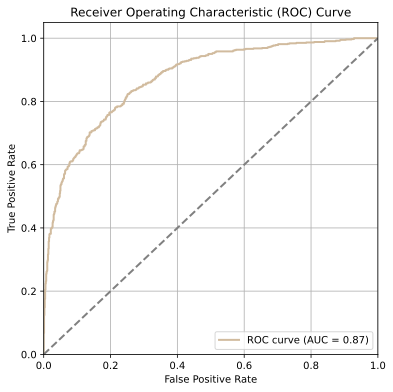

In [51]:
# Predict the probabilities for the test set
y_probs = hyperband_search.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='#D1BB9E', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])  # Set x-axis limits
plt.ylim([0.0, 1.05])  # Set y-axis limits
plt.xlabel('False Positive Rate')  # Label for x-axis
plt.ylabel('True Positive Rate')  # Label for y-axis
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Title of the plot
plt.legend(loc='lower right')  # Legend location
plt.grid()
plt.show()

In [52]:
# Compute precision and recall values for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Compute F1 score for each threshold
f_score = (2 * precision * recall) / (precision + recall)

# Find the index of the threshold that maximizes F1 score
ix = np.argmax(f_score)

# Use the threshold with the highest F1 score to predict binary values
binary_preds = np.where(y_probs > thresholds[ix], 1, 0)

# Generate classification report
report = classification_report(y_test, binary_preds)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.85      0.74      0.79       938
           1       0.71      0.83      0.77       742

    accuracy                           0.78      1680
   macro avg       0.78      0.78      0.78      1680
weighted avg       0.79      0.78      0.78      1680



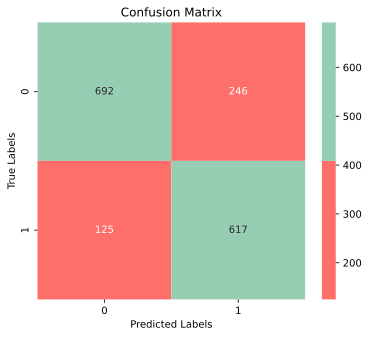

In [53]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, binary_preds)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=['#ff6f69', '#96ceb4'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 40px; text-align: center; font-family: avenir;">
    
### Feature Importances

In [54]:
# Access the best estimator from the grid search
best_estimator = hyperband_search.best_estimator_

# Access the regressor from the best estimator
regressor = best_estimator.named_steps['classifier']


# Check if the regressor has feature_importances_ attribute
if hasattr(regressor, 'feature_importances_'):
    # Get feature importances
    feature_importances = regressor.feature_importances_
    
    # Access the 'features' pipeline from the best estimator
    features_pipeline = best_estimator.named_steps['features']
    
    # Manually specify the feature names after transformation
    numeric_feature_names = X_train.columns.tolist()  # Assuming all columns are numeric
    
    # Calculate the total importance sum of all features
    total_importance = feature_importances.sum()
    
    # Calculate the percentage contribution of each feature
    feature_importance_percentage = (feature_importances / total_importance) * 100
    
    # Create a DataFrame with the percentage contribution of each feature
    features_percentage_df = pd.DataFrame({'Feature': numeric_feature_names,
                                           'Importance (%)': feature_importance_percentage})
    
    # Sort the DataFrame by importance in descending order
    features_percentage_df = features_percentage_df.sort_values(by='Importance (%)', ascending=False)
    
    # Display the top features with their percentage contributions
    print(features_percentage_df.head(20))

              Feature  Importance (%)
121  transaction_2010        4.633333
78           mcc_5912        3.633333
88           mcc_5977        3.166667
39           mcc_4814        3.066667
59           mcc_5541        2.833333
34             hour_0        2.800000
35            hour_22        2.666667
118  transaction_1030        2.600000
67           mcc_5661        2.533333
138  transaction_7010        2.266667
71           mcc_5732        2.233333
55           mcc_5499        2.233333
68           mcc_5691        2.166667
63           mcc_5621        2.166667
58           mcc_5533        2.133333
47           mcc_5211        2.000000
74           mcc_5812        1.800000
65           mcc_5651        1.766667
127  transaction_2330        1.700000
122  transaction_2011        1.666667


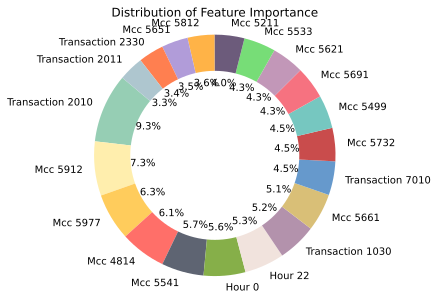

In [55]:
# Store the counts in a list
features = features_percentage_df['Feature'].tolist()[:20]
counts = features_percentage_df['Importance (%)'][:20]

# Define labels for the counts
labels = list(map(lambda x: x.replace('_', ' ').title(), features))

# Create a pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140,
        colors=['#96ceb4', '#ffeead', '#ffcc5c', 
                '#ff6f69', '#5e6472', '#86af49',
                '#f1e3dd', '#b392ac', '#d9bf77',
                '#6699cc', '#c94c4c', '#76c7c0',
                '#f67280', '#c297b8', '#77dd77',
                '#6c5b7b', '#ffb347', '#b19cd9', 
                '#ff7f50', '#aec6cf']
)

# Draw a circle in the center to create a ring
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Distribution of Feature Importance')

plt.show()

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ffeead, #96ceb4, #b8a9c9); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='ten'></a> Test Data Submission

In [56]:
# Select only the columns (features) identified as important by the Lasso regression model in the testing dataset
X = test_data[selected_features]

# Use the best_model to predict the target variable for the testing dataset
target_pred = hyperband_search.predict_proba(X)[:, 1]

# Read the sample submission file and set the 'Id' column as the index
submission = pd.read_csv('./data/gender_test.csv', index_col='customer_id')

# Update the 'SalePrice' column in the submission DataFrame with the predicted target variable values
submission['probability'] = target_pred

# Save the submission DataFrame to a CSV file named 'submission.csv' in the './data' directory
submission.to_csv('./data/submission.csv')


submission

,probability
customer_id,
75562265,0.332380
84816985,0.561433
54129921,0.085856
23160845,0.055155
45646491,0.262832
...,...
89647691,0.617028
53818229,0.955437
88924303,0.241944


In [57]:
!pip freeze > requirements.txt

In [58]:
!python3 --version

Python 3.11.7


In [59]:
!which python

/Users/sergey/.pyenv/versions/3.11.7/bin/python
